In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

### Задача 1.1

Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [2]:
df = pd.read_csv("kc-house-data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df['price'].max()

7700000.0

### Задание 1.2

Изучите стоимости недвижимости

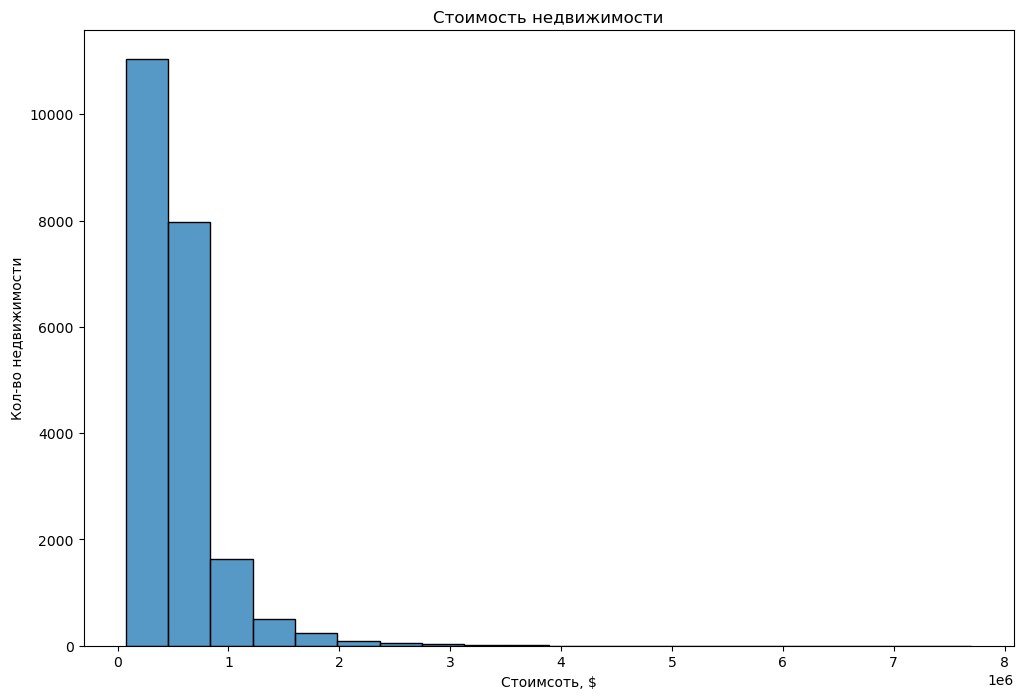

In [4]:
plt.figure(figsize=(12, 8))

sns.histplot(df['price'], bins = 20)

plt.title('Стоимость недвижимости')
plt.xlabel('Стоимсоть, $')
plt.ylabel('Кол-во недвижимости');

Из графика видно, что большинство домов стоят в пределах от 0 до 2 миллионов долларов.

### Задание 1.3

Изучите распределение квадратуры жилой

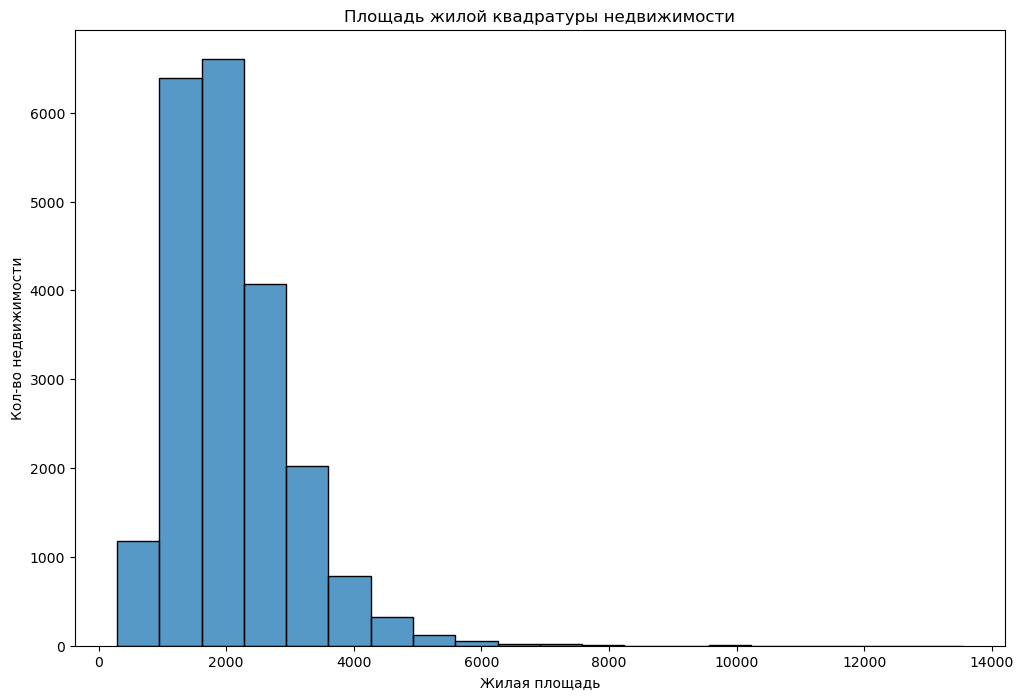

In [5]:
plt.figure(figsize=(12, 8))

sns.histplot(df['sqft_living'], bins = 20)

plt.title('Площадь жилой квадратуры недвижимости')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во недвижимости');

Большинство домов имеют жилую площадь в пределах от 1000 до 4000 квадратный футов

### Задание 1.4

Изучите распределение года постройки

In [6]:
data = df.groupby('yr_built')['id'].agg(count = 'count').reset_index().sort_values(by = 'yr_built')
data

,yr_built,count
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45
...,...,...
111,2011,130
112,2012,170
113,2013,201
114,2014,559


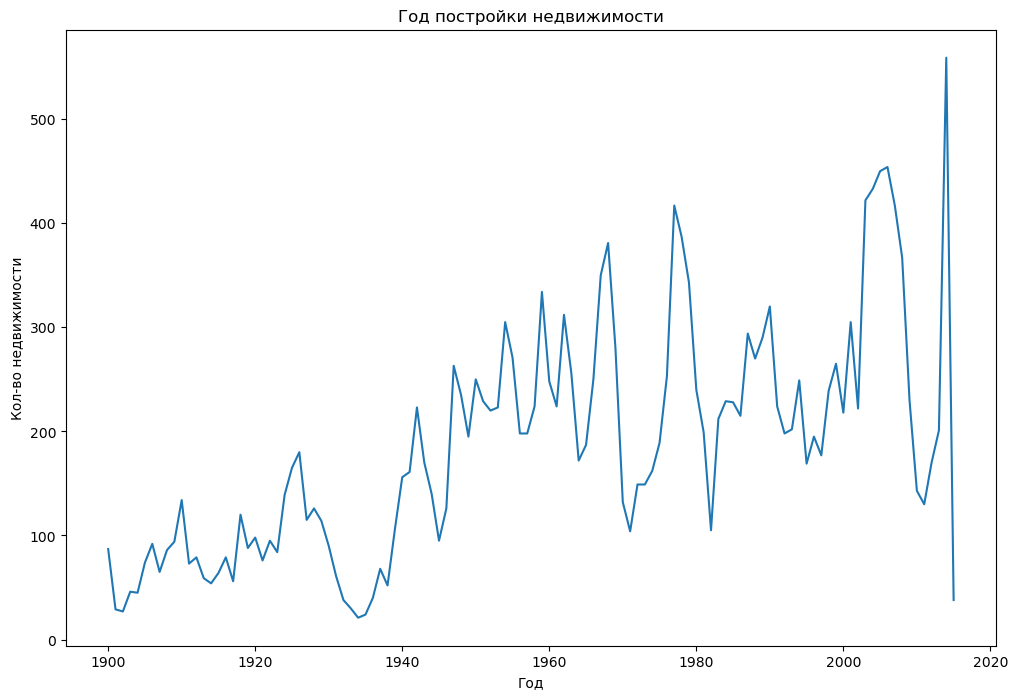

In [7]:
plt.figure(figsize=(12, 8))

plt.plot(data['yr_built'], data['count'])

plt.title('Год постройки недвижимости')
plt.xlabel('Год')
plt.ylabel('Кол-во недвижимости');

Из графика видно, что количество построенных домов увеличивалось с годами.

## Задание 2

Постройте график

Сделайте выводы

### Задание 2.1

Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

In [8]:
data = df['waterfront'].value_counts()
data.index = ['No', 'Yes']
data

No     21450
Yes      163
Name: waterfront, dtype: int64

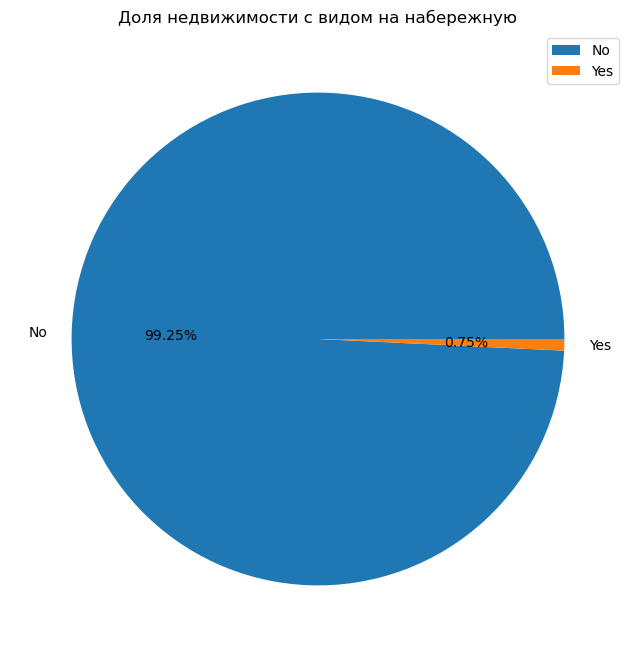

In [9]:
plt.figure(figsize = (12, 8))

plt.pie(data, labels = data.index, autopct='%.2f%%')

plt.title('Доля недвижимости с видом на набережную')
plt.legend(data.index);

Больше 99% недвижимости не имеют вид на набережную

### Задание 2.2

Изучите распределение этажей домов

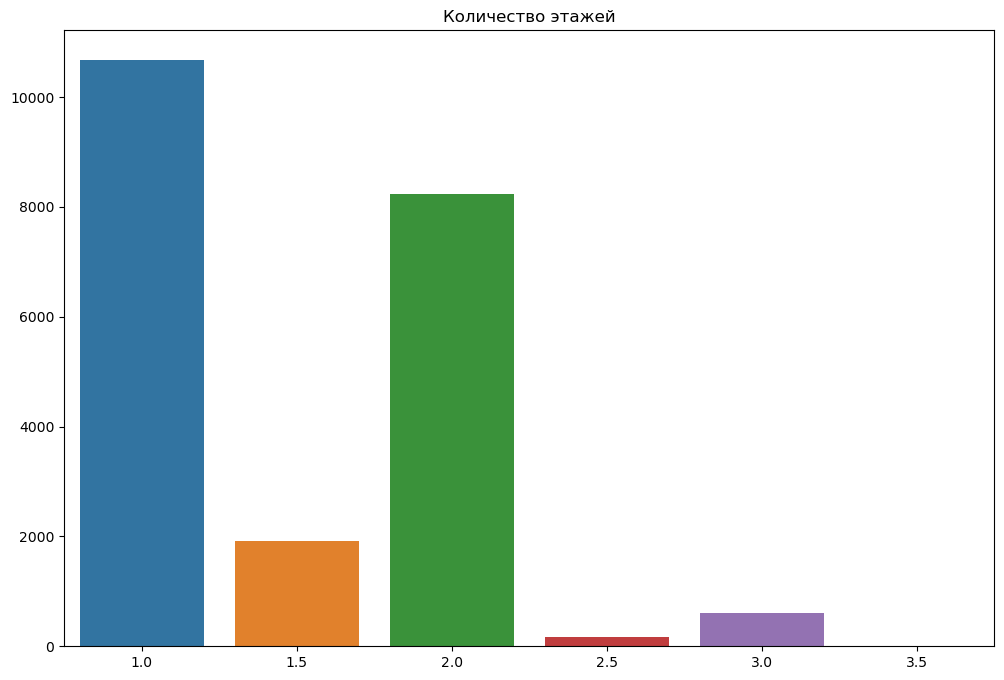

In [10]:
counts = df['floors'].value_counts()

plt.figure(figsize = (12, 8))
plt.title('Количество этажей')
sns.barplot(x=counts.index, y=counts.values)

plt.show;

Большинство домов имеют 1 или 2 этажа. Все остальные составляют лишь маленькую часть домов.

### Задание 2.3

Изучите распределение состояния домов

In [11]:
data = df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

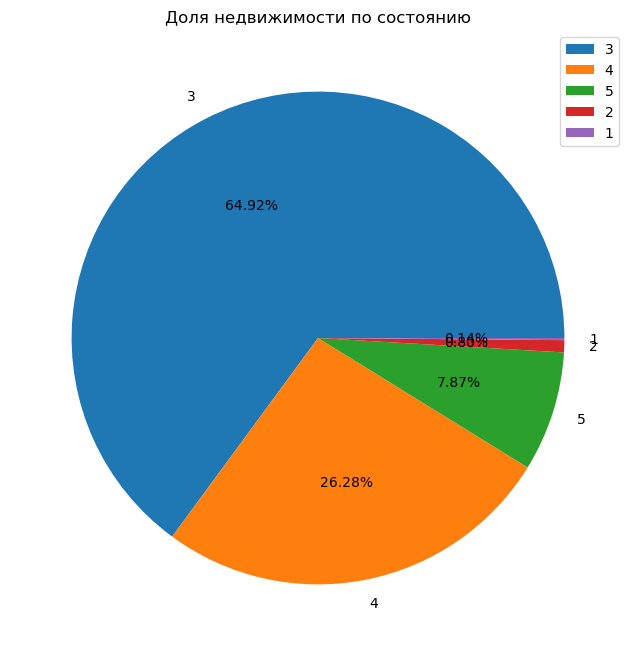

In [12]:
plt.figure(figsize = (12, 8))

plt.pie(data, labels = data.index, autopct='%.2f%%')

plt.title('Доля недвижимости по состоянию')
plt.legend(data.index);

Из графика видно, что большинство домов имеют среднюю оценку. Интересно заметить, что домов, состояние которых является 1 или 2 всего меньше 1%.

## Задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

В первую очередь надо посмотреть на зависимость стоимости от оценки. Если посмотреть с логической точки зрения, чем больше оценка тем и будет больше стоимость дома.

Text(0, 0.5, 'Стоимость')

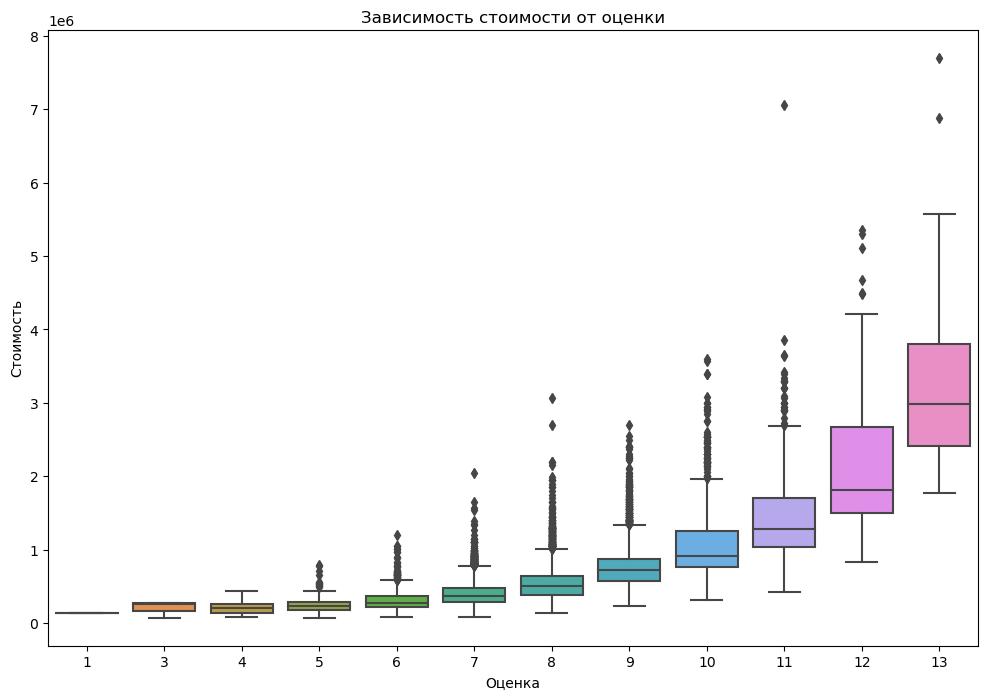

In [13]:
plt.figure(figsize = (12, 8))

sns.boxplot(x = df['grade'], y = df['price'])

plt.title('Зависимость стоимости от оценки')
plt.xlabel('Оценка')
plt.ylabel('Стоимость')

Как видно на графике, то что я сказал ранее является верным. С увеличением оценки - увеличивается стоимость самого дома. Оценка состовляет из себя совокупность качество состояния, дизайна и вида из дома. Но пободробнее хотелось бы узнать о зависимости стоимости от наличия вида на набережную.

Text(0, 0.5, 'Стоимость')

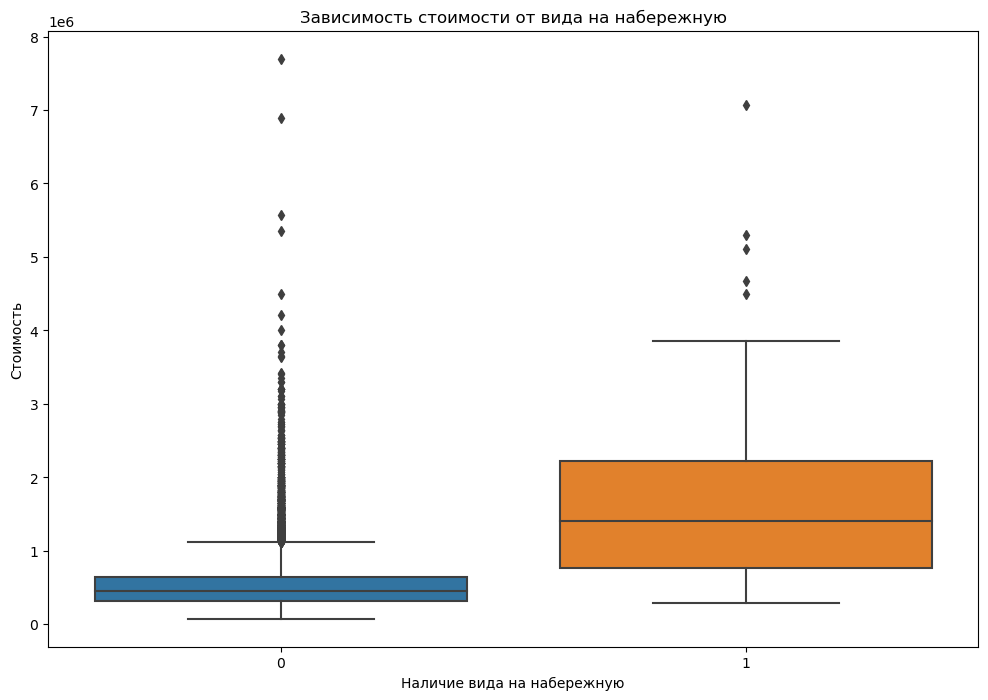

In [14]:
plt.figure(figsize = (12, 8))

sns.boxplot(x = df['waterfront'], y = df['price'])

plt.title('Зависимость стоимости от вида на набережную')
plt.xlabel('Наличие вида на набережную')
plt.ylabel('Стоимость')

И как видно да, начилие видна на набережную влияет на стоимость дома. Интересная идея будет посмотреть влияет ли год постройки на стоимость дома? Чем новее дом - тем больше его стоимость.

<Figure size 1200x800 with 0 Axes>

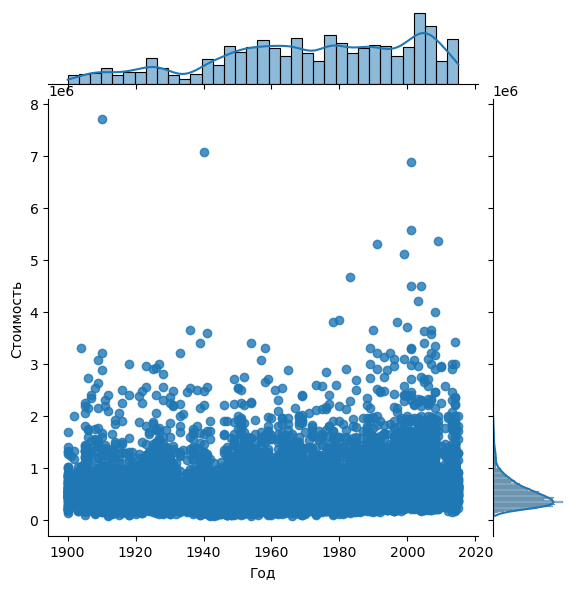

In [15]:
plt.figure(figsize = (12, 8))

sns.jointplot(x = df['yr_built'], y = df['price'], kind = 'reg');

plt.xlabel('Год')
plt.ylabel('Стоимость');

Здесь я был не прав. Год постройки никак не влияет на стоимость самого дома. Идея была хоть и интересная, но взаимосвязи здесь нет. Дальше можно будет посмотреть на связь с жилой площадью.

<Figure size 1200x800 with 0 Axes>

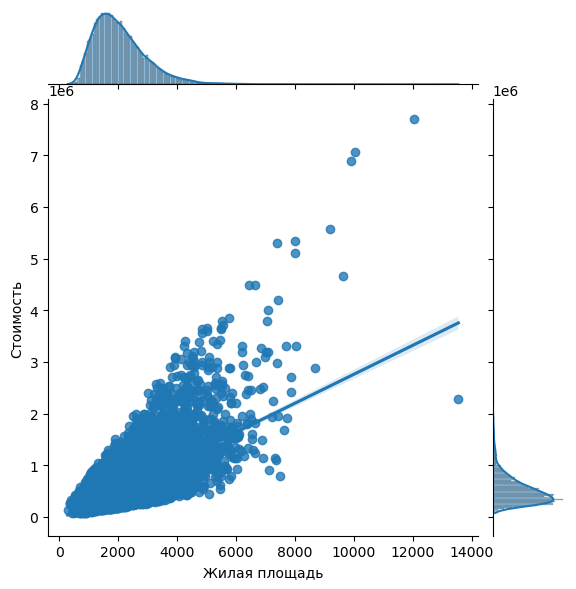

In [16]:
plt.figure(figsize = (12, 8))

sns.jointplot(x = df['sqft_living'], y = df['price'], kind = 'reg');

plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость');

А здесь явно видно, что количество жилой площади влияет на цену дома! Явно заметна линейная зависимость. И наконец у меня есть еще одна интересная идея. Влияние расположения дома на цену. Может быть есть районы где дома стоят гораздо дороже, чем в окраинах.

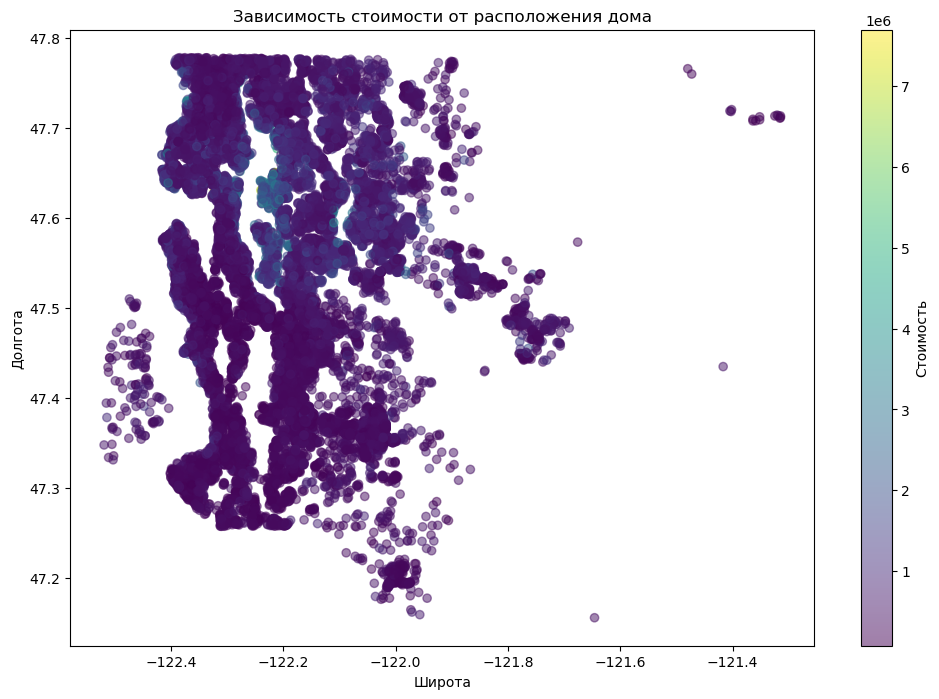

In [17]:
plt.figure(figsize = (12, 8))

sc = plt.scatter(df['long'], df['lat'], alpha = 0.5, c = df['price'])

clbar = plt.colorbar(sc)
clbar.set_label('Стоимость')

plt.title('Зависимость стоимости от расположения дома')
plt.xlabel('Широта')
plt.ylabel('Долгота');

Хоть она и не сильная, но зависимость кое-какая есть. Дома на долготе 47.6 и широте -122.2 стоят чуточку дороже, чем в других местах.